## Lead Scoring Case Study

Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

#### Business Goals:

Target is to help X Education increase the conversion rate. To acquire this we need to build a Logistic Regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. Along with the above, we need to handle the problems faced by the company along with adjust to company's future requirements.

The Steps we will be using in this assignment are:

1. Reading and Understanding the data
2. Cleaning the data
3. Performing EDA
4. Creating Dummies
5. Splitting of Test and Train set
6. Building Model
7. Making Prediction
8. Model Evaluation
9. ROC Curve
10. Precision - Recall
11. Prediction on Test set

### Reading and Understanding the data

In [1]:
#Importing the libraries and reading the dataset
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
lead_score= pd.read_csv('C:\\Users\\Sourav Roy\\Downloads\\Lead score Asignment\\Lead Scoring Assignment\\Leads.csv')
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead_score.shape

(9240, 37)

In [5]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Cleaning the data

In [6]:
perc_null=round(100*lead_score.isnull().sum()/lead_score.shape[0],2)
perc_null

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From the above it is found that the number of columns where the % of missing data is more than 50% is just 1 i.e. 'Lead Quality'. Remaining are less than 50%. However there are few columns which are not of much importance, so we need to delete them. But before that let us look at the data of 'Lead Quality'.

In [7]:
lead_score['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [8]:
print(lead_score['Lead Quality'].value_counts(normalize= True))

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: Lead Quality, dtype: float64


From the data dictionary, the defination of 'Lead Quality' is given as 'Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead'. So from the defination it is estimated to be an important column which can be used in the analysis. So, since the intuition is not sure, it is better to update the blanks as 'Not Sure'. 

In [9]:
lead_score['Lead Quality'] = lead_score['Lead Quality'].replace(np.nan, 'Not Sure')
print(lead_score['Lead Quality'].value_counts(normalize= True))

Not Sure             0.634091
Might be             0.168831
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: Lead Quality, dtype: float64


Now let us agian look at the % of null values.

In [10]:
perc_null=round(100*lead_score.isnull().sum()/lead_score.shape[0],2)
perc_null

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From the above, we can drop the columns which have null values greater than 40%

In [11]:
perc_null=perc_null[perc_null>40]
drop= (perc_null[perc_null>40].index)
drop= list(drop)
drop

['Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [12]:
lead_score=lead_score.drop(labels=drop,axis=1)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Ringing,Not Sure,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [13]:
perc_null=round(100*lead_score.isnull().sum()/lead_score.shape[0],2)
perc_null

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Converting the columns having Yes/ No as data to 1/0 where 1 stands as Yes and 0 stands as No.
for value in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    lead_score[value] = lead_score[value].apply(lambda x : 1 if x=='Yes' else 0)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Interested in other courses,Low in Relevance,0,0,Select,Select,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Ringing,Not Sure,0,0,Select,Select,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Ringing,Not Sure,0,0,Select,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,0,0,Modified


In [15]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We need to look at the columns where select is given as a value and check the % of such data in those columns. If the % of select is high then it is better to drop those columns as it won't add any value to our prediction and plotting a random value under select will distort our prediction. Also, we need to check the distribution of data in the columns. If it is unevenly distributed then it is better to drop that column as it won't help us in our analysis.

In [16]:
lead_score.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [17]:
for column in lead_score.iloc[:,1:].select_dtypes(include='object').columns:
    print('\033[1m',column,'\033[0m')
    print()
    print(lead_score[column].value_counts(normalize= True))
    print()
    print()

 Lead Origin 

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


 Lead Source 

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64


 Last Activity 

Email Opened                    0.376163
SMS Sent                      

1. Under 'Specialization' select is 24% of the data, but since specialization is an important parameter to determine the conversion rate so we would keep it.
2. Under 'How did you hear about X Education' select is 71% which is very high, so drop the column.
3. Under 'What matters most to you in choosing a course' has 99% data under Better career prospects, so better to drop the column.
4. Under 'Lead Profile' select is 63% which is very high, so drop the column.
5. Since 'Country' has 95% value as India, it is better to drop the column as data would be concentrated under 'India'.
6. Since 85% of the value under 'What is your current occupation' is Unemployed, so computing the null as Unemployed
7. Since 'Tags' has 35% value as 'Will revert after reading the email' so computing the null value as the same.
8. Since under 'City' 41% of value is Mumbai and 29% is Select and 15% is null, so computing 44% of the data under Mumbai is not practical. So, it is better to drop the column 'City' as the data would be concentrated under 'Mumbai' city which would give unrealistic prediction from 'City' from of view. 

In [18]:
# Since specialization is an important parameter , hence it will be safer to impute NaN and select with Others
lead_score['Specialization'] = lead_score['Specialization'].replace(np.nan, 'Others')
lead_score['Specialization'] = lead_score['Specialization'].replace('Select', 'Others')

In [19]:
lead_score['Specialization'].unique()

array(['Others', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [20]:
print(lead_score['Specialization'].value_counts(normalize= True))

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64


In [21]:
# Dropping the columns which won't be contibuting in Model Building
lead_score.drop(['Lead Number','How did you hear about X Education','What matters most to you in choosing a course','Lead Profile'], axis=1, inplace=True)

In [22]:
# Dropping the columns which won't be contibuting in Model Building
lead_score.drop(['Country','City'], axis=1, inplace=True)

In [23]:
# Replacing the null and select values with the desired ones as mentioned above.
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(np.nan,'Unemployed')
lead_score['Tags'] = lead_score['Tags'].replace(np.nan,'Will revert after reading the email')

In [24]:
perc_null=round(100*lead_score.isnull().sum()/lead_score.shape[0],2)
perc_null

Prospect ID                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

From the above it is found that mostly the null values are treated. Only few columns with almost 1% of the rows as null is still present in the dataset. We can remove those rows for further evaluation.

In [25]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_score.dropna(inplace=True)

In [26]:
perc_null=round(100*lead_score.isnull().sum()/lead_score.shape[0],2)
perc_null

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [27]:
lead_score.shape

(9074, 27)

In [28]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Origin                               9074 non-null   object 
 2   Lead Source                               9074 non-null   object 
 3   Do Not Email                              9074 non-null   int64  
 4   Do Not Call                               9074 non-null   int64  
 5   Converted                                 9074 non-null   int64  
 6   TotalVisits                               9074 non-null   float64
 7   Total Time Spent on Website               9074 non-null   int64  
 8   Page Views Per Visit                      9074 non-null   float64
 9   Last Activity                             9074 non-null   object 
 10  Specialization                      

### Performing EDA

In [29]:
# Our Target variable is 'Converted', so we need to check the data imbalance of the column for further analysis.
lead_score["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

From the above we can see that 62% of the data is No and 37% of the data is Yes, which is as per the Problem statement. We have a good representation of the data and we are good to go with the further analysis.

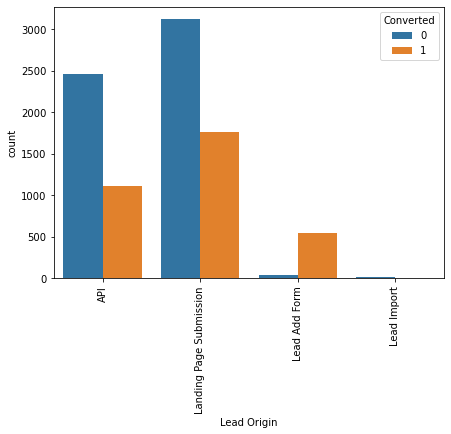

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.show()

Fom the above graph following observations are made:
1. It is found that for API and Landing Page Submission, the number of 'No' is more than 'Yes'. However, the conversion is on a higher side compared to other parameters. 
2. In case, of Lead Add Form, the count is low, but the number of converison is on a higher side compared to other parameters.
3. Lead Import has very less count and similarly the conversion.

Thus, to improve the overall lead conversion rate, we should focus on increasing the converison rate for 'API', 'Landing Page Submission'. Also, since 'Lead Add Form' has more converison so focus should be to increase the count of the same.

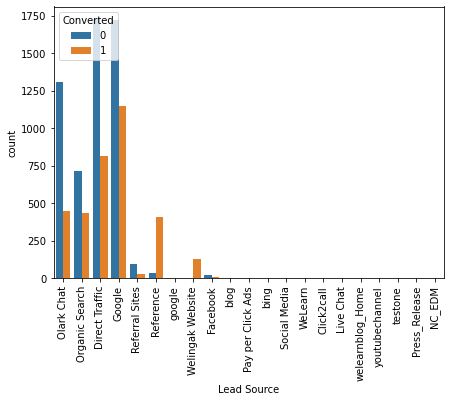

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.show()

From the 'Lead Source' graph, it is found that many of the data has ver less count. So, it is better to map such datas under 'Others_Lead_Source'. Also, we can see that google has different representation which needs to be checked and mapped under same category.

In [32]:
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing','Social Media', 'WeLearn',
'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release','NC_EDM'], 'Others_Lead_Source')

lead_score['Lead Source'] = lead_score['Lead Source'].replace("google", 'Google')

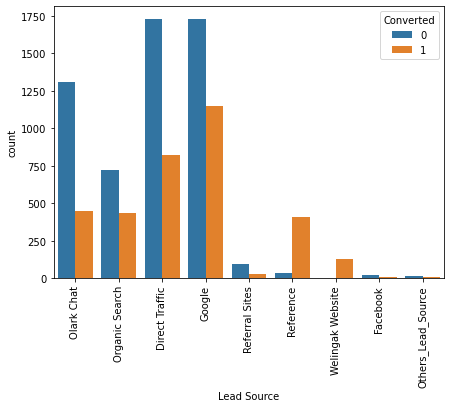

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.show()

From the above 'Lead Source' graph following observations are made:
1. The count of Direct Traffic and Google is high and so as the conversion rate is. But the number of 'No' is on a higher side.
2. It is observed that Conversion rate through refrence and Welingak Website is high.
3. The Conversion rate of Olark Chat is low compared to the count.

Thus, to increase the overall conversion rate, focus should be to increase the conversion rate through Google and Direct Traffic. Also, the % of reference needs to be increased as it is observed that chances of conversion through reference is high along with Welingak Website. Along with the above Organic Search and Olark Chat should also be focused as the potential of converison is high.

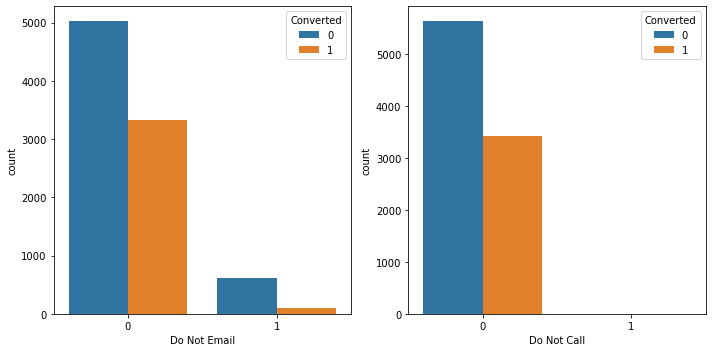

In [34]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_score)
plt.xticks(rotation =0)

plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_score)
plt.xticks(rotation =0)
plt.tight_layout()

From the above, it is observed that all those who didn't opted for email or call has higher conversion rate which do not gives a clear picture for further analysis. So no interpretation can be drawed.

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

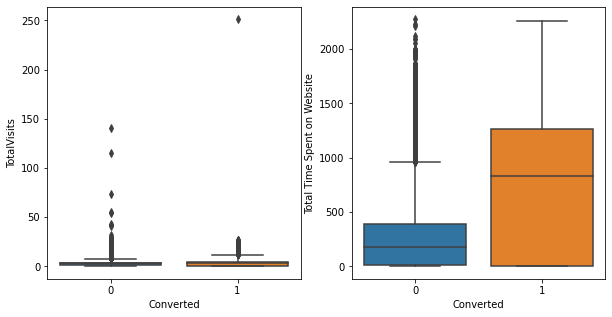

In [35]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_score)
plt.subplot(1,2,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_score)

In [36]:
# Total Visit has lot of Outliers, so we need to compute these and cap the variable to 95 percentile
percentile=lead_score['TotalVisits'].quantile([0.05,0.95]).values
lead_score['TotalVisits'][lead_score['TotalVisits'] <= percentile[0]] = percentile[0]
lead_score['TotalVisits'][lead_score['TotalVisits'] >= percentile[1]] = percentile[1]

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

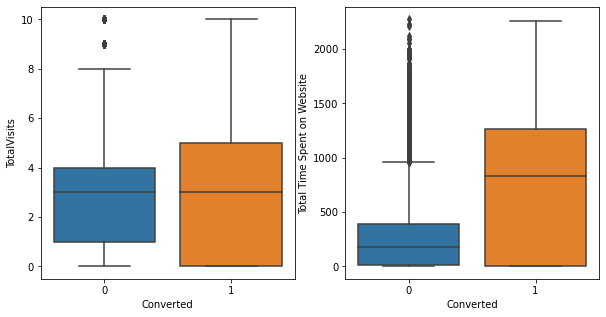

In [37]:
# Plotting the graph after making the above changes
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_score)
plt.subplot(1,2,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_score)

From the above following observations can be made:
1. Since the median of 'TotalVisits' is the same so nothing can be concluded from it.
2. From the column 'Total Time Spent on Website', it is found that the median of converted is high.

Thus it can be concluded that those who spend time on the website looking after the courses are more likely to be converted. Thus, website needs to be more simple to use and it should contain all information required for the course so that the rate of conversion also increases.

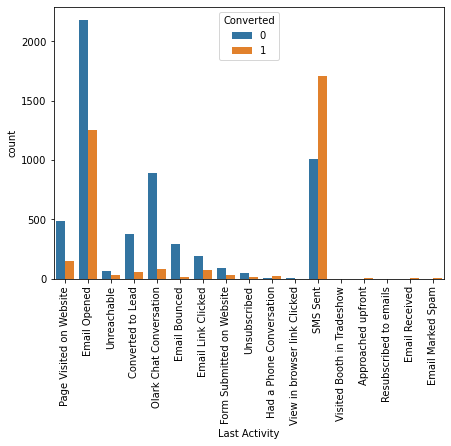

In [38]:
plt.figure(figsize=(7,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.show()

From the 'Last Activity' graph, it is found that many of the data has ver less count. So, it is better to map such datas under 'Others_Last_Activity'.

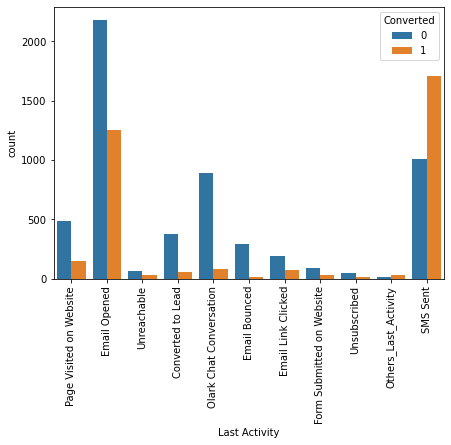

In [39]:
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
    'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others_Last_Activity')

plt.figure(figsize=(7,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.show()

Following observation can be drawn from the above,
1. The count of email opened is higher than any other activity, however the rate of conversion is less than the ones not converted.
2. It is observed that rate of conversion for sms_sent is the highest among all.

Thus it can be concluded that more sms needs to be sent as the chances of conversion is the highest. Also, the emails which are sent should have all the necessary information so that the basic doubts gets clarified which would result in increasing the conversion rate.

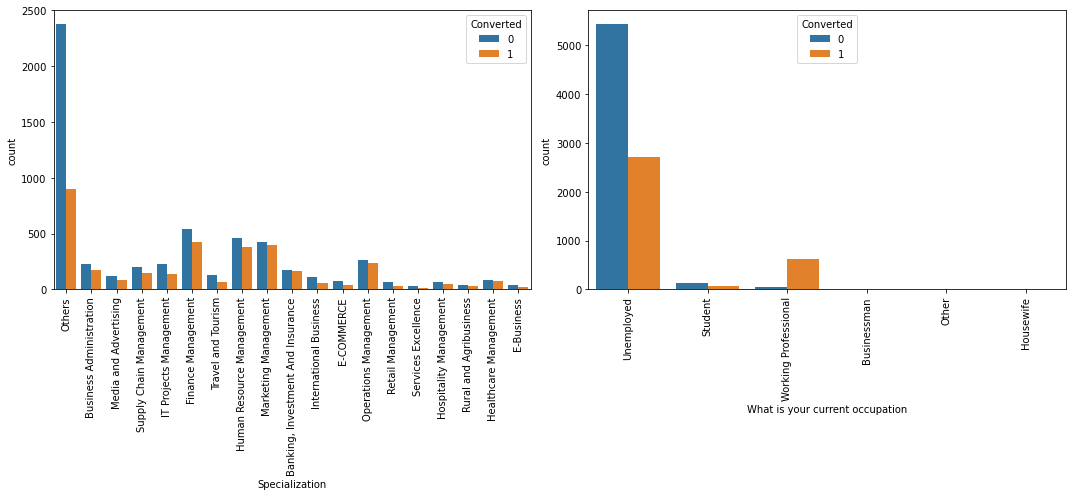

In [40]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sns.countplot(x = "Specialization", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)

plt.subplot(1,2,2)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.tight_layout()

From the above following observations are made:
1. From the specialization, since Others have both null and select value so no conclusion can be drawn.
2. The count of Unemployed is more than any other parameter.
3. It is observed that Working Professional has a higher rate of conversion.

Thus it can be concluded that, focus should be to increase the total count of applications under Working Professional as the conversion rate is high. Also, sales team should specifically pitch the working professional for a higher career growth, then the converison rate will increase. Also, among Umployed, sales team should give attention and should try to increase the conversion rate.

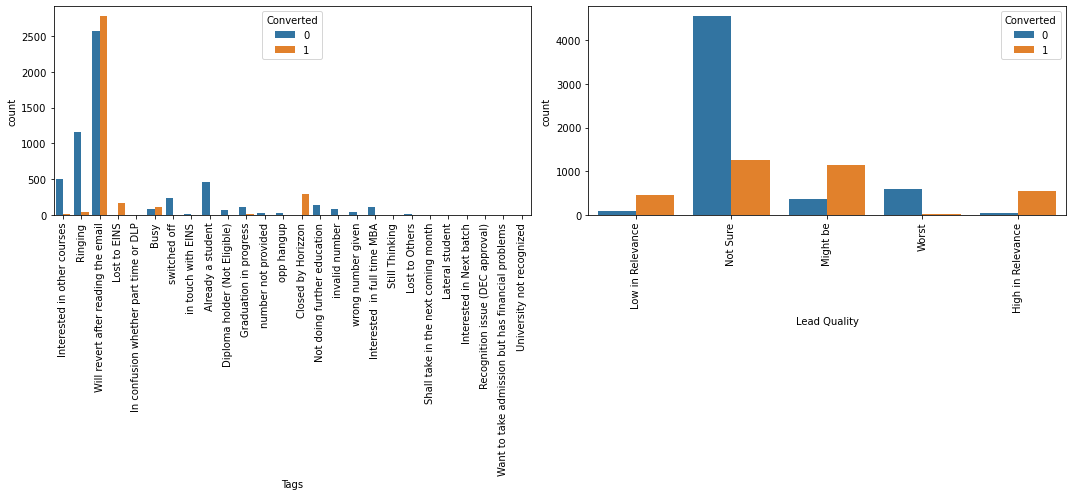

In [41]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sns.countplot(x = "Tags", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)

plt.subplot(1,2,2)
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.tight_layout()

From the 'Tags' graph, it is found that many of the data has ver less count. So, it is better to map such datas under 'Others_Tags'.

In [42]:
lead_score['Tags'] = lead_score['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                    'Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Others_Tags')

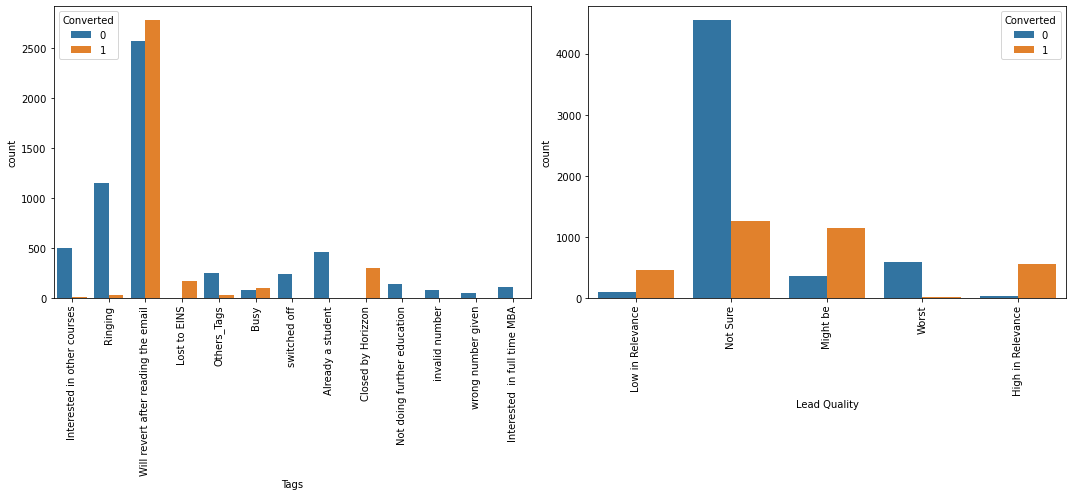

In [43]:
plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sns.countplot(x = "Tags", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)

plt.subplot(1,2,2)
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.tight_layout()

From the above, following observations are made:
1. 'Will revert after reading the email' has the highest rate of conversion.
2. The count of 'not sure' is high, also the conversion rate is low.
3. 'Might be' conversion rate is high.
4. 'High in Relevance' conversion rate is high.
5. 'Closed by Horizon' has a high rate of conversion compared to its count.

Thus it can be concluded that sales team should reach out every indivudual through mail and should wait for their responses. Also, those who proposes to communicate after reading the mail, should be in touch constantly for increasing the conversion rate. Also, the team should focus on increasing the conversion and count of 'Closed by Horizon'.
Among Lead Quality focus should be to increase the 'might be'and 'High in Relevance' parameter as the chances of converison is high. Also, those who are 'not sure' should be pursued on a regular basis to increase the conversion rate. 

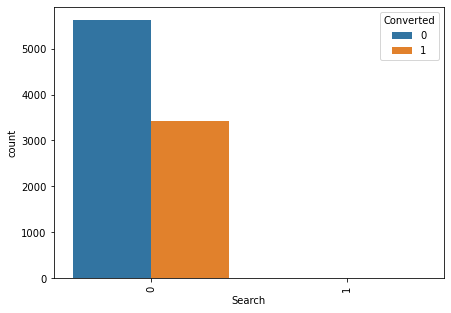

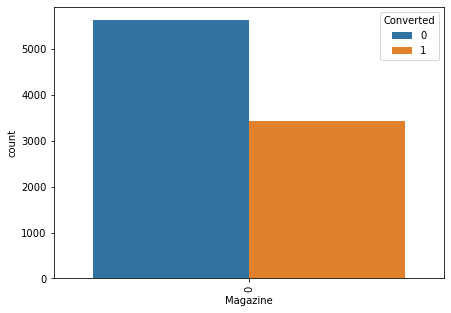

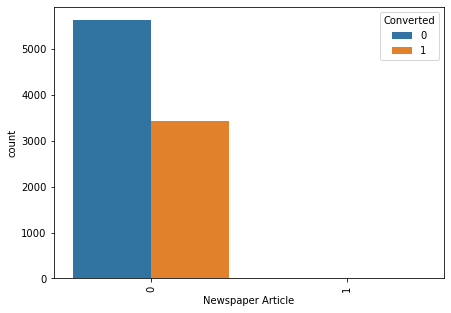

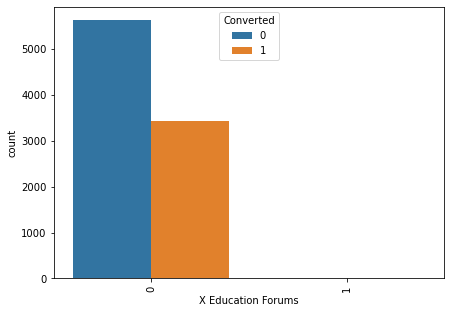

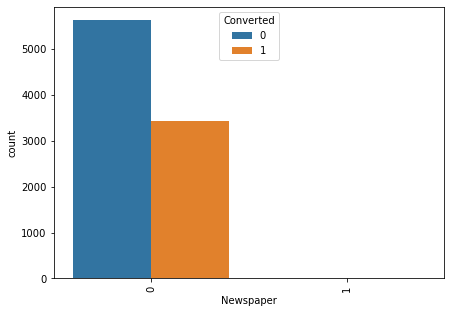

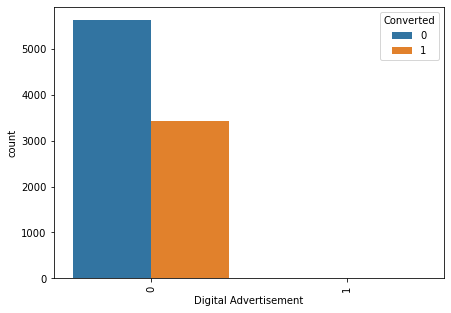

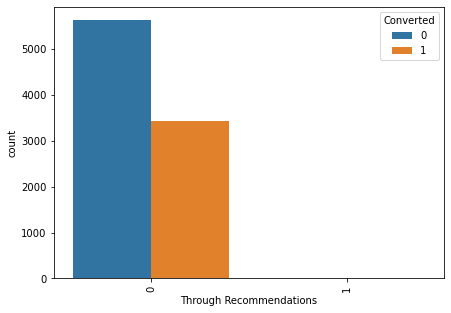

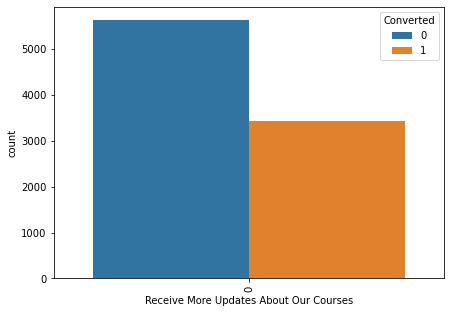

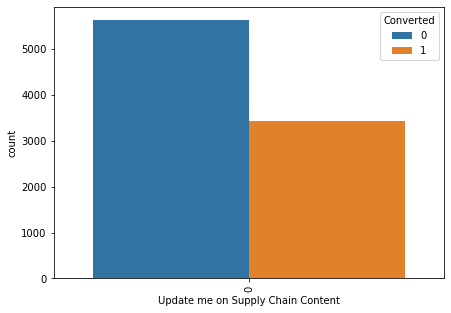

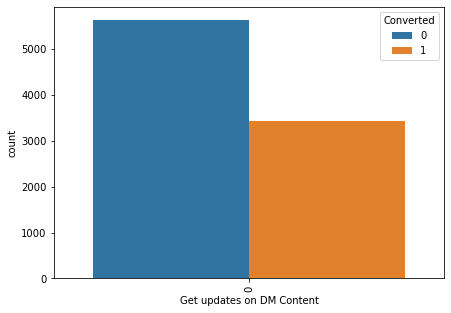

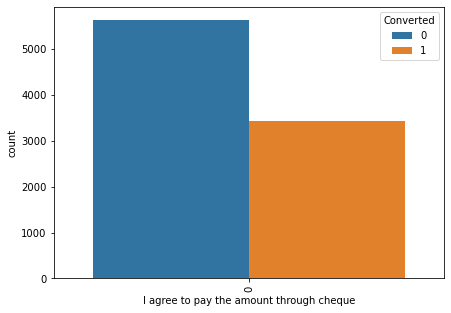

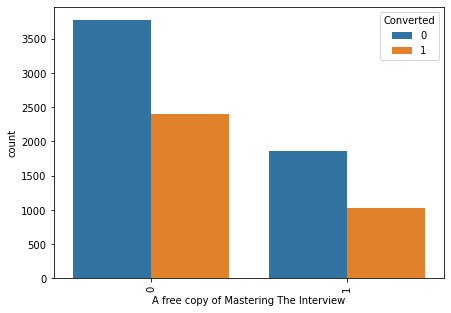

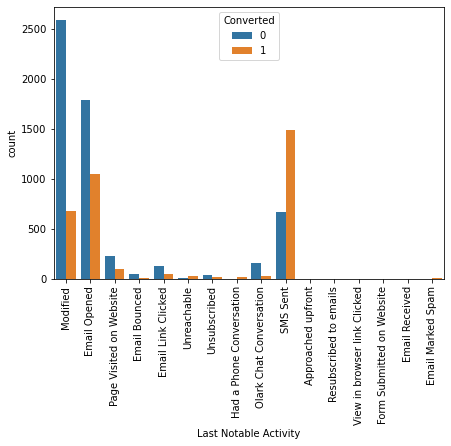

In [44]:
for i, lead in enumerate(["Search", "Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview","Last Notable Activity"]):
    fig=plt.subplots(figsize=[7,5])
    sns.countplot(x=lead, hue="Converted", data=lead_score)
    plt.xticks( rotation=90)
    plt.show()

From the above we can see that the above parameters don't add to the prediction and no conclusion can be drawn from it. Hence we can drop the above columns except Last Notable Activity as it helps in our future understanding.

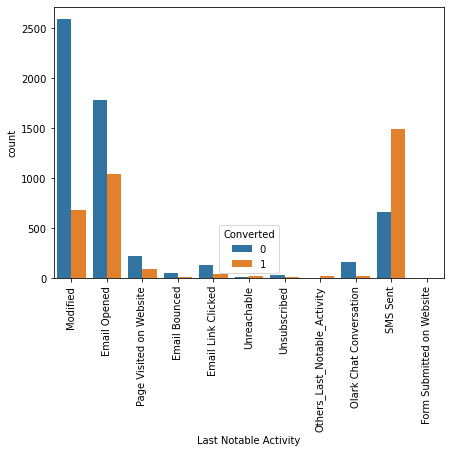

In [46]:
lead_score['Last Notable Activity'] = lead_score['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails','View in browser link Clicked','Had a Phone Conversation',
            'From Submitted on Website','Email Received', 'Email Marked Spam'], 'Others_Last_Notable_Activity')

plt.figure(figsize=(7,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_score)
plt.xticks(rotation =90)
plt.show()

In [47]:
# Dropping the columns which won't be contibuting in Model Building
lead_score.drop(["Search", "Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"], axis=1, inplace=True)

In [48]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Do Not Call                      9074 non-null   int64  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Tags                

In [49]:
lead_score.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified


### Creating Dummies

In [50]:
dummy= pd.get_dummies(lead_score[['Lead Origin', 'Lead Source','Last Activity','Specialization','What is your current occupation',
                              'Tags','Lead Quality','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
lead_score=lead_score.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','Last Notable Activity'], axis=1)
lead_score.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0


In [52]:
lead_score.shape

(9074, 7)

In [53]:
lead_score = pd.concat([lead_score, dummy], axis=1)
lead_score.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
lead_score.shape

(9074, 77)

### Splitting of Test and Train set

In [55]:
X_axis = lead_score.drop(['Prospect ID','Converted'], axis=1)

y_axis = lead_score['Converted']

print(y_axis)
X_axis.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_axis, y_axis, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6351, 75)
(2723, 75)
(6351,)
(2723,)


In [57]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,6351.000000,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,4.153503e-17,2.774246e-16,-3.059538e-16,0.535979,0.068651,0.003779,0.003936,0.320737,...,0.018422,0.305464,0.000157,0.359471,0.019052,0.002834,0.034483,0.244371,0.004094,0.004409
std,0.269581,0.017744,1.000079e+00,1.000079e+00,1.000079e+00,0.498743,0.252879,0.061362,0.062622,0.466797,...,0.134483,0.460640,0.012548,0.479883,0.136719,0.053166,0.182480,0.429747,0.063857,0.066257
min,0.000000,0.000000,-1.150329e+00,-8.886503e-01,-1.132538e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-7.915538e-01,-8.703028e-01,-6.561023e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-7.400339e-02,-4.354671e-01,-1.796662e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,6.435470e-01,8.002366e-01,4.539939e-01,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.437423e+00,3.195502e+00,1.030193e+01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Correlation between different numerical variables.
conv_corr = X_train.corr()
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(15)

Lead Origin_Lead Import                Lead Source_Facebook                                  0.979718
Lead Origin_Lead Add Form              Lead Source_Reference                                 0.859537
Last Activity_Email Opened             Last Notable Activity_Email Opened                    0.858361
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                        0.851814
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed                    0.846581
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked              0.804444
TotalVisits                            Page Views Per Visit                                  0.756104
Last Activity_Others_Last_Activity     Last Notable Activity_Others_Last_Notable_Activity    0.726687
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website         0.685169
Do Not Email                           Last Activity_Email Bounced                

From the above we can see that 'Lead Source_Facebook', 'Lead Source_Reference', 'Page Views Per Visit', 'Last Activity_Email Bounced' are highly correlated features. However, we would like to limit the features with the help of RFE.

In [60]:
# Feature selection using RFE.
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=15)  
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 30),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 42),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 49),
 ('Lead Source_Others_Lead_Source', False, 45),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 51),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 61),
 ('Last Activity_Form Submitted on Website', False, 57),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Others_Last_Activity', False, 9),
 ('Last Activity_Page Visited on Website', False, 34),
 ('Last A

In [62]:
# Columns selected by RFE
columns=X_train.columns[rfe.support_]
columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Building Model

In [63]:
# Model-1

X_train_sm = sm.add_constant(X_train[columns])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.1
Date:                Fri, 30 Dec 2022   Deviance:                       3160.2
Time:                        21:05:22   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5663
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7920      0.278     -2.845      0.004      -1.338      -0.246
Do Not Email                                  -1.3202      0.212     -6.236      0.000      -1.735      -0.905
Lead Origin_Lead Add Form                      1.0521      0.363      2.897      0.004       0.340       1.764
Lead Source_Welingak Website                   3.4638      0.819      4.231      0.000       1.859       5.068
What is your current occupation_Unemployed    -1.1148      0.237     -4.713      0.000      -1.578      -0.651
Tags_Busy                                      3.5772      0.333     10.752      0.000       2.925       4.229
Tags_Closed by Horizzon                        7.7760      0.762     10.203      0.000       6.282       9.270
Tags_Lost to EINS                              8.9986      0.754     11.931      0.000       7.520      10.477
Tags_Ringing                                  -1.9203      0.340     -5.640      0.000      -2.588      -1.253
Tags_Will revert after reading the email       3.7576      0.229     16.412      0.000       3.309       4.206
Tags_invalid number                          -23.4125   2.21e+04     -0.001      0.999   -4.34e+04    4.34e+04
Tags_switched off                             -2.5224      0.589     -4.279      0.000      -3.678      -1.367
Tags_wrong number given                      -23.0270   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                         -3.3269      0.129    -25.702      0.000      -3.581      -3.073
Lead Quality_Worst                            -3.9922      0.832     -4.798      0.000      -5.623      -2.361
Last Notable Activity_SMS Sent                 2.7952      0.122     22.846      0.000       2.555       3.035
==============================================================================================================
"""

p-value of 0.05 is considered as the confidence interval.
We use significance (p-value) and VIF to decide the variables we need to drop.

In [64]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.37
12,Lead Quality_Not Sure,4.05
8,Tags_Will revert after reading the email,4.02
7,Tags_Ringing,1.86
1,Lead Origin_Lead Add Form,1.58
14,Last Notable Activity_SMS Sent,1.54
13,Lead Quality_Worst,1.35
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
10,Tags_switched off,1.17


We generally consider VIF less than 5.

General Case:
1. High p-value, high VIF- drop
2. High p-value, low VIF - remove 1st 
3. low p-value, high VIF - remove after the one above
4. low p-value, low VIF- Keep

In [65]:
# From the above, Tags_invalid number has 0.999 p-value, So removing the column.
columns=columns.drop('Tags_invalid number')
columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [66]:
# Model-2

X_train_sm = sm.add_constant(X_train[columns])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.9
Date:                Fri, 30 Dec 2022   Deviance:                       3171.8
Time:                        21:18:47   Pearson chi2:                 3.07e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5655
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9144      0.282     -3.245      0.001      -1.467      -0.362
Do Not Email                                  -1.3129      0.211     -6.218      0.000      -1.727      -0.899
Lead Origin_Lead Add Form                      1.0839      0.365      2.969      0.003       0.368       1.800
Lead Source_Welingak Website                   3.4275      0.819      4.184      0.000       1.822       5.033
What is your current occupation_Unemployed    -1.1577      0.239     -4.848      0.000      -1.626      -0.690
Tags_Busy                                      3.7579      0.331     11.338      0.000       3.108       4.407
Tags_Closed by Horizzon                        7.9271      0.763     10.394      0.000       6.432       9.422
Tags_Lost to EINS                              9.1535      0.755     12.128      0.000       7.674      10.633
Tags_Ringing                                  -1.7229      0.339     -5.089      0.000      -2.386      -1.059
Tags_Will revert after reading the email       3.9200      0.230     17.026      0.000       3.469       4.371
Tags_switched off                             -2.3187      0.588     -3.942      0.000      -3.471      -1.166
Tags_wrong number given                      -20.8331   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3174      0.129    -25.685      0.000      -3.571      -3.064
Lead Quality_Worst                            -3.9830      0.834     -4.777      0.000      -5.617      -2.349
Last Notable Activity_SMS Sent                 2.7537      0.121     22.849      0.000       2.518       2.990
==============================================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.26
11,Lead Quality_Not Sure,4.04
8,Tags_Will revert after reading the email,3.88
7,Tags_Ringing,1.82
1,Lead Origin_Lead Add Form,1.58
13,Last Notable Activity_SMS Sent,1.53
12,Lead Quality_Worst,1.35
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
9,Tags_switched off,1.16


In [68]:
# From the above, Tags_wrong number given has 0.999 p-value, So removing the column.
columns=columns.drop('Tags_wrong number given')
columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [69]:
# Model-3

X_train_sm = sm.add_constant(X_train[columns])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.9
Date:                Fri, 30 Dec 2022   Deviance:                       3175.8
Time:                        21:24:22   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5653
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9661      0.283     -3.417      0.001      -1.520      -0.412
Do Not Email                                  -1.3127      0.211     -6.223      0.000      -1.726      -0.899
Lead Origin_Lead Add Form                      1.0963      0.366      2.995      0.003       0.379       1.814
Lead Source_Welingak Website                   3.4147      0.820      4.166      0.000       1.808       5.021
What is your current occupation_Unemployed    -1.1746      0.240     -4.899      0.000      -1.644      -0.705
Tags_Busy                                      3.8305      0.330     11.598      0.000       3.183       4.478
Tags_Closed by Horizzon                        7.9914      0.763     10.480      0.000       6.497       9.486
Tags_Lost to EINS                              9.2178      0.755     12.217      0.000       7.739      10.697
Tags_Ringing                                  -1.6472      0.337     -4.885      0.000      -2.308      -0.986
Tags_Will revert after reading the email       3.9881      0.229     17.380      0.000       3.538       4.438
Tags_switched off                             -2.2412      0.587     -3.816      0.000      -3.392      -1.090
Lead Quality_Not Sure                         -3.3158      0.129    -25.690      0.000      -3.569      -3.063
Lead Quality_Worst                            -3.9600      0.836     -4.734      0.000      -5.599      -2.321
Last Notable Activity_SMS Sent                 2.7443      0.120     22.856      0.000       2.509       2.980
==============================================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.18
10,Lead Quality_Not Sure,4.04
8,Tags_Will revert after reading the email,3.81
7,Tags_Ringing,1.80
1,Lead Origin_Lead Add Form,1.58
12,Last Notable Activity_SMS Sent,1.52
11,Lead Quality_Worst,1.35
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
9,Tags_switched off,1.16


In [71]:
# From the above, What is your current occupation_Unemployed has 7.18 VIF, So removing the column.
columns=columns.drop('What is your current occupation_Unemployed')
columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [72]:
# Model-4

X_train_sm = sm.add_constant(X_train[columns])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Fri, 30 Dec 2022   Deviance:                       3202.0
Time:                        21:56:57   Pearson chi2:                 3.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5635
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9192      0.211     -9.080      0.000      -2.333      -1.505
Do Not Email                                -1.2835      0.212     -6.062      0.000      -1.698      -0.868
Lead Origin_Lead Add Form                    1.2035      0.368      3.267      0.001       0.482       1.925
Lead Source_Welingak Website                 3.2825      0.820      4.002      0.000       1.675       4.890
Tags_Busy                                    3.8043      0.330     11.525      0.000       3.157       4.451
Tags_Closed by Horizzon                      7.9789      0.762     10.467      0.000       6.485       9.473
Tags_Lost to EINS                            9.1948      0.753     12.209      0.000       7.719      10.671
Tags_Ringing                                -1.8121      0.336     -5.401      0.000      -2.470      -1.154
Tags_Will revert after reading the email     3.9906      0.228     17.508      0.000       3.544       4.437
Tags_switched off                           -2.4456      0.586     -4.171      0.000      -3.595      -1.297
Lead Quality_Not Sure                       -3.5218      0.126    -28.036      0.000      -3.768      -3.276
Lead Quality_Worst                          -3.9106      0.856     -4.567      0.000      -5.589      -2.232
Last Notable Activity_SMS Sent               2.7395      0.120     22.907      0.000       2.505       2.974
============================================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[columns].values, i) for i in range(X_train[columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality_Not Sure,2.62
7,Tags_Will revert after reading the email,2.57
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.52
11,Last Notable Activity_SMS Sent,1.51
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.10
3,Tags_Busy,1.10
8,Tags_switched off,1.10


From the above we can see that the p-value is less than 0.05 and VIF is less than 5. So we can consider the Model 4 as the final model.

### Making Prediction

In [74]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.189946
1012    0.061006
9226    0.000707
4750    0.784007
7987    0.977108
1281    0.991926
2880    0.189946
4971    0.750786
7536    0.888099
1248    0.000707
dtype: float64

In [75]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.89945603e-01, 6.10055097e-02, 7.07499981e-04, 7.84007054e-01,
       9.77108077e-01, 9.91926005e-01, 1.89945603e-01, 7.50785828e-01,
       8.88098557e-01, 7.07499981e-04])

In [76]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID
0,0,0.189946,3009
1,0,0.061006,1012
2,0,0.000707,9226
3,1,0.784007,4750
4,1,0.977108,7987


In [77]:
# Creating a new column predicted.
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted
0,0,0.189946,3009,0
1,0,0.061006,1012,0
2,0,0.000707,9226,0
3,1,0.784007,4750,1
4,1,0.977108,7987,1


From the above we can see that we have taken an arbitary cut-off i.e. 0.5

### Model Evaluation

In [78]:
# Creating the Confusion Matrix

# Predicted     not_converted    converted
# Actual
# not_converted        TN         FP
# converted            FN         TP

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3751  154]
 [ 357 2089]]


In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

accuracy_sc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
sensitivity_score = TP / float(TP+FN)
specificity_score = TN / float(TN+FP)
precision_sc = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

print("Accuracy :", accuracy_sc)
print("Sensitivity :", sensitivity_score)
print("Specificity :", specificity_score)
print("Precision :", precision_sc)

Accuracy : 0.9195402298850575
Sensitivity : 0.8540474243663123
Specificity : 0.9605633802816902
Precision : 0.9313419527418636


### ROC Curve

1. ROC curve shows the trade-off between sensitivity and specificity. Increase in one will cause decrease in other
2. The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

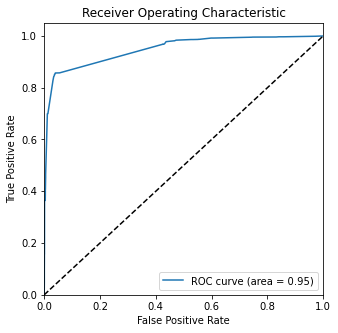

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

From the above it is observed that area under ROC curve is 0.95 which is high and it depicts that our final Model is a good one. However, above we have taken an arbitary cut-off i.e. 0.5. So we need to dertermine the best cut-off value

In [82]:
# Finding the best cut-off

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1


In [84]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.706503,0.981194,0.534443
0.2,0.2,0.911195,0.857318,0.944942
0.3,0.3,0.919383,0.856909,0.958515
0.4,0.4,0.920170,0.856092,0.960307
0.5,0.5,0.919540,0.854047,0.960563
0.6,0.6,0.920170,0.851594,0.963124
0.7,0.7,0.918753,0.843827,0.965685
0.8,0.8,0.876397,0.700327,0.986684
0.9,0.9,0.790742,0.464841,0.994878


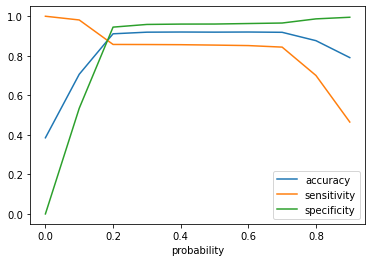

In [87]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.19 is the optimum point to take it as a cutoff probability.

### Precision - Recall

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.19 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [90]:
# Lead score to the dataset
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_probability.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


### Model Evaluation

In [92]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion1)

[[3690  215]
 [ 349 2097]]


In [96]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

accuracy_sc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
sensitivity_score = TP / float(TP+FN)
specificity_score = TN / float(TN+FP)
precision_sc = metrics.precision_score (y_train_pred_final.Converted, y_train_pred_final.final_predicted)

print("Accuracy :", accuracy_sc)
print("Sensitivity :", sensitivity_score)
print("Specificity :", specificity_score)
print("Precision :", precision_sc)

Accuracy : 0.911195087387813
Sensitivity : 0.857318070318888
Specificity : 0.9449423815620999
Precision : 0.9070069204152249


In [98]:
# Looking at the Confusion Matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3751  154]
 [ 357 2089]]


In [99]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9313419527418636

In [100]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8540474243663123

In [101]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

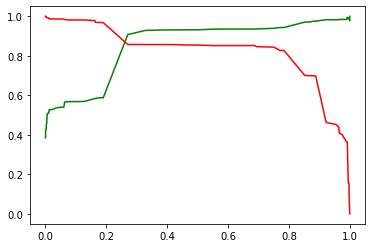

In [103]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [107]:
y_train_pred_final['final_predicted_new'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.27 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final_predicted_new
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,19,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,6,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,78,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,98,1


In [108]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_probability.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final_predicted_new
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,19,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,6,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,78,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,98,1


In [114]:
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_new)
print(confusion_final)

[[3690  215]
 [ 349 2097]]


In [115]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

accuracy_sc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_new)
sensitivity_score = TP / float(TP+FN)
specificity_score = TN / float(TN+FP)
precision_sc = metrics.precision_score (y_train_pred_final.Converted, y_train_pred_final.final_predicted_new)

print("Accuracy :", accuracy_sc)
print("Sensitivity :", sensitivity_score)
print("Specificity :", specificity_score)
print("Precision :", precision_sc)

Accuracy : 0.911195087387813
Sensitivity : 0.857318070318888
Specificity : 0.9449423815620999
Precision : 0.9070069204152249


### Prediction on Test set

In [116]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[columns])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_test_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_test_predicted_final['final_predicted'] = y_test_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_test_predicted_final['Lead_Score'] = y_test_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_test_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.189946,0,19
1,1,1490,0.888099,1,89
2,0,7936,0.189946,0,19
3,1,4216,0.999300,1,100
4,0,3830,0.189946,0,19


In [117]:
confusion_test_final = metrics.confusion_matrix(y_test_predicted_final.Converted, y_test_predicted_final.final_predicted)
print(confusion_test_final)

[[1640   94]
 [ 157  832]]


In [118]:
TP = confusion_test_final[1,1] # true positive 
TN = confusion_test_final[0,0] # true negatives
FP = confusion_test_final[0,1] # false positives
FN = confusion_test_final[1,0] # false negatives

accuracy_sc = metrics.accuracy_score(y_test_predicted_final.Converted, y_test_predicted_final.final_predicted)
sensitivity_score = TP / float(TP+FN)
specificity_score = TN / float(TN+FP)
precision_sc = metrics.precision_score (y_test_predicted_final.Converted, y_test_predicted_final.final_predicted)

print("Accuracy :", accuracy_sc)
print("Sensitivity :", sensitivity_score)
print("Specificity :", specificity_score)
print("Precision :", precision_sc)

Accuracy : 0.9078222548659567
Sensitivity : 0.8412537917087968
Specificity : 0.9457900807381776
Precision : 0.8984881209503239


In [136]:
def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Converted_probability':y_train_pred})
    y_train_pred_final['final_predicted_new'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_predicted_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Converting_Probability':y_test_pred})
    y_test_predicted_final['final_predicted'] = y_test_predicted_final.Converting_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_predicted_final['Lead_Score'] = y_test_predicted_final.Converting_Probability.map(lambda x: round(x*100))
    y_test_predicted_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_predicted_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    print("Accuracy :", accuracy_sc)
    print("Sensitivity :", sensitivity_score)
    print("Specificity :", specificity_score)
    print("Precision :", precision_sc)
    
    return y_test_predicted_final

In [137]:
build_model_cutoff(X_train[columns], y_train, X_test[columns], y_test, cutoff=0.27)

------------------Result of training data-------------------
   Prospect ID  Converted  Converted_probability  final_predicted_new  \
0         3009          0               0.189946                    0   
1         1012          0               0.061006                    0   
2         9226          0               0.000707                    0   
3         4750          1               0.784007                    1   
4         7987          1               0.977108                    1   

   Lead_Score  
0          19  
1           6  
2           0  
3          78  
4          98  
------------------Result of test data-------------------
   Prospect ID  Converted  Converting_Probability  final_predicted  Lead_Score
0         3271          0                0.189946                0          19
1         1490          1                0.888099                1          89
2         7936          0                0.189946                0          19
3         4216          1      

,Prospect ID,Converted,Converting_Probability,final_predicted,Lead_Score
0,3271,0,0.189946,0,19
1,1490,1,0.888099,1,89
2,7936,0,0.189946,0,19
3,4216,1,0.999300,1,100
4,3830,0,0.189946,0,19
...,...,...,...,...,...
2718,850,0,0.189946,0,19
2719,2879,0,0.004316,0,0
2720,6501,1,0.991926,1,99
2721,7155,0,0.189946,0,19


### Conclusion

* Here in the above Logistic Regression model, the Optimum Cut-off is considered as 0.27.
* This signifies that any lead which signifies a probability greater than 0.27 can be considered as a hot lead.
* The accuracy of the model is more than 90%. This prediction would help the CEO make decisions appropiately.
* Apart from the above the Sales team should focus on the recommendations made above as per behaviour of various parameters to convert the conversion rate.